In [2]:
import pandas as pd


In [3]:
data = pd.read_csv('multiple3.txt', header=None, names=['x1', 'x2'])
data.head()

,x1,x2
0,1.96,-0.09
1,2.84,3.16
2,4.74,1.84
3,6.36,4.89
4,1.77,1.55


In [4]:
import sklearn.cluster as sc
import matplotlib.pyplot as plt

In [5]:
# 创建模型
#model = sc.KMeans(n_clusters)  # n_cluster为聚类数量
model = sc.KMeans(n_clusters=4)  # n_cluster为聚类数量

model.fit(data)
# 获取聚类(几何)中心
centers = model.cluster_centers_

# 获取聚类标签（聚类结果）
pred_y = model.labels_

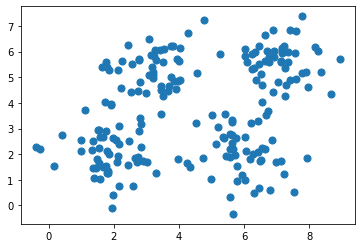

In [6]:
plt.scatter(data['x1'], data['x2'], s=50)

In [7]:
centers

array([[5.91196078, 2.04980392],
       [3.1428    , 5.2616    ],
       [7.07326531, 5.61061224],
       [1.831     , 1.9998    ]])

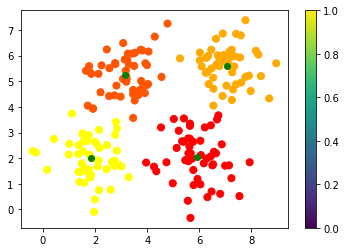

In [8]:
plt.scatter(data['x1'], data['x2'], s=50, c=pred_y, cmap='autumn')
plt.scatter(7.073265, 5.610612, color='green')
plt.scatter(1.831000, 1.999800, color='green')
plt.scatter(5.911961, 2.049804, color='green')
plt.scatter(3.142800, 5.261600, color='green')
plt.colorbar()

In [9]:
#DBSCAN

In [12]:
# 创建噪声密度聚类器
model = sc.DBSCAN(eps=0.65,  # 半径
                  min_samples=5)  # 最小样本数
model.fit(data)
# 获取聚类(几何)中心
# 获取聚类标签（聚类结果）
pred_y = model.labels_

In [23]:
import numpy as np
import sklearn.metrics as sm

In [35]:
eps_params = np.arange(0.5, 1.0, 0.1)
sample_params = np.arange(5, 14)

In [36]:
score_hight = 0

In [37]:
for i in eps_params:
    for j in sample_params:
        # 创建噪声密度聚类器
        model = sc.DBSCAN(eps=i,  # 半径
                          min_samples=j)  # 最小样本数
        model.fit(data)
        pred_y = model.labels_
        score = sm.silhouette_score(data,  # 样本
                                    pred_y,  # 标签
                                    sample_size=len(data),  # 样本数量
                                    metric="euclidean")  # 欧式距离度量
        if score > score_hight:
            print("eps:{},sample:{},得分：{}".format(i, j, score))
            score_hight = score

eps:0.5,sample:5,得分：0.3489543894412516
eps:0.6,sample:6,得分：0.39453643460213256
eps:0.7,sample:5,得分：0.39862113170627206
eps:0.7,sample:6,得分：0.48177875239367907
eps:0.7999999999999999,sample:8,得分：0.49965898951922694
eps:0.8999999999999999,sample:9,得分：0.5296849468203374


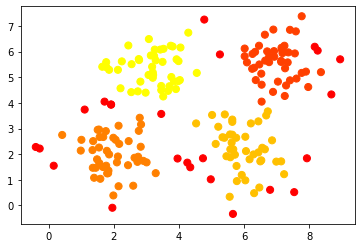

In [13]:
plt.scatter(data['x1'], data['x2'], s=50, c=pred_y, cmap='autumn')

In [10]:
#凝聚层次模型

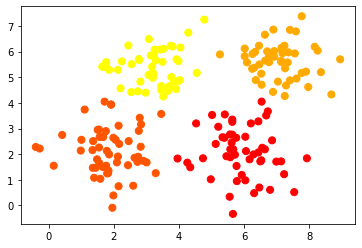

In [14]:
model = sc.AgglomerativeClustering(n_clusters=4)  # n_cluster为聚类数量
model.fit(data)  # 训练
pred_y = model.labels_  # 聚类标签（聚类结果）
plt.scatter(data['x1'], data['x2'], s=50, c=pred_y, cmap='autumn')

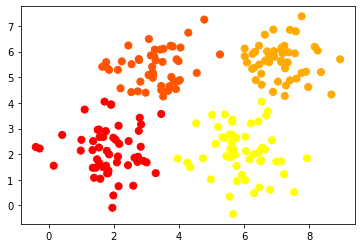

In [15]:
model = sc.AgglomerativeClustering(n_clusters=4, linkage='average')  # n_cluster为聚类数量
model.fit(data)  # 训练
pred_y = model.labels_  # 聚类标签（聚类结果）
plt.scatter(data['x1'], data['x2'], s=50, c=pred_y, cmap='autumn')

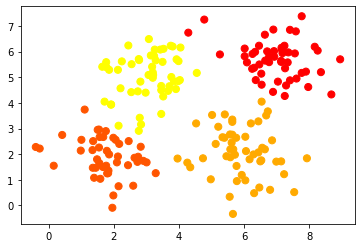

In [16]:
model = sc.AgglomerativeClustering(n_clusters=4, linkage='complete')  # n_cluster为聚类数量
model.fit(data)  # 训练
pred_y = model.labels_  # 聚类标签（聚类结果）
plt.scatter(data['x1'], data['x2'], s=50, c=pred_y, cmap='autumn')

In [18]:
import sklearn.metrics as sm

In [17]:
#模型评估

In [19]:
score = sm.silhouette_score(data,  # 样本
                            pred_y,  # 标签
                            sample_size=len(data),  # 样本数量
                            metric="euclidean")  # 欧式距离度量

In [20]:
score

0.5599861952077719